# Reading in the data and preparing it 

In [1]:
import pandas as pd
import json
import numpy as np


# reading in data
data = pd.read_csv('data/booksummaries.txt', sep='\t', header = None)
data

,0,1,2,3,4,5,6
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...


In [2]:
# columns 1 and 2 seem to have no useful information we will drop them 
data.drop(columns=[0, 1], inplace=True)
data[2] = data[2].astype(str)
data.head()

,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [3]:
data[5][0]

'{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}'

In [4]:
# droping any without tags, should probably change the column names may takle later 

data[5].isnull().values.any()

data_2 = data.dropna(subset=[5])

data_2


,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...
16555,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...


In [5]:
# column 5 with   

# so one of the categories we saw was Novel and another fiction, as we are largely dealing with 
# fiction in general, be it science fiction, romance, etc this is not terribly helpful 
# so as long novel or fiction are not the only tags we want to remove them
def remove_novel(x):
    if len(x) > 1 and 'Novel' in x:
        x.remove('Novel')
    if len(x) > 1 and 'Fiction' in x:
        x.remove('Fiction')   
    
    return x


# this turns the jason into a list
stdf = data_2[5].apply(json.loads)

# stdf[0].values()


# this gets us just the values of the newly created list  
stdf = stdf.apply(lambda x: x.values())

# print(stdf)

# not sure if this is necessary but it made me feel more comfortable
stdf = stdf.apply(lambda x: list(x))

# finally removing novel and fiction tags if there are more despcriptive ones
stdf = stdf.apply(remove_novel)

# print(stdf.isnull().values.any())

stdf

0        [Roman à clef, Satire, Children's literature, ...
1        [Science Fiction, Novella, Speculative fiction...
2                      [Existentialism, Absurdist fiction]
4        [Hard science fiction, Science Fiction, Specul...
5                                [War novel, Roman à clef]
                               ...                        
16549                                    [Science Fiction]
16551                                 [Thriller, Suspense]
16555                                           [Thriller]
16556                                      [Autobiography]
16558              [Epistolary novel, Speculative fiction]
Name: 5, Length: 12841, dtype: object

In [6]:
# getting the first category under the assumption it is the most importanty one
stdf = stdf.map(lambda x: x[0])

stdf

0                Roman à clef
1             Science Fiction
2              Existentialism
4        Hard science fiction
5                   War novel
                 ...         
16549         Science Fiction
16551                Thriller
16555                Thriller
16556           Autobiography
16558        Epistolary novel
Name: 5, Length: 12841, dtype: object

In [7]:
# checking how many categories we have and how many exmaples of each
count_subj = stdf.explode().value_counts()
count_subj = count_subj.to_frame()
count_subj

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
...,...
Catastrophic literature,1
School story,1
Collage,1
Social criticism,1


In [8]:
# We have too many categories, 180, and many have one entry this is not data we can work with
# so lets look at categhories with over 50 entries

count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
Mystery,735
Crime Fiction,672
Fantasy,625
Thriller,568
Young adult literature,321


In [9]:
# it's still very imbalanced data, so we will try and group some together i.e.mystery, crime fiction, thriller, spy  all into one, 
# young adult and childrens 

# expanding the mystery cataegory 
stdf = stdf.map(lambda x : 'Mystery' if(x == 'Crime Fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Thriller') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Spy fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Detective fiction') else x)

# comcinging fiction and novel 
stdf = stdf.map(lambda x : 'Fiction' if(x == 'Novel') else x)

# combining childrens lit and young adult 
stdf = stdf.map(lambda x : 'Children\'s literature' if(x == 'Young adult literature') else x)

# expanind historical novel category 
stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Historical fiction') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Alternate history') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'War novel') else x)



In [10]:
# double checking our new categories 
# not ideal but better will cut off everything after fantasy, and try with just those 7 remain categories 
count_subj = stdf.explode().value_counts()

count_subj

count_subj = count_subj.to_frame()
count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Mystery,2139
Fiction,1622
Children's literature,1480
Speculative fiction,1444
Historical novel,770
Fantasy,625
Non-fiction,167
Romance novel,140
Autobiography,94


In [11]:
# puting the category series nack into the data 
data_2.insert(4, "category", stdf, True)

data_2

,2,3,4,5,category,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",Roman à clef,"Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",Existentialism,The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",Hard science fiction,The novel posits that space around the Milky ...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...,...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...
16555,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",Mystery,The reader first meets Rapp while he is doing...
16556,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",Autobiography,The book follows very rough chronological ord...


In [12]:
# Taking only the generes with enough data, not really ideal but I have close to 10K among 7 geners so hopefully will do 

data_3 = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
| (data_2['category'] == 'Fiction') | (data_2['category'] == 'Children\'s literature') 
| (data_2['category'] == 'Speculative fiction') | (data_2['category'] == 'Historical novel') | (data_2['category'] == 'Fantasy')                   
                   ]
data_3

,2,3,4,5,category,6
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...
...,...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",Children's literature,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",Mystery,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...


In [13]:
data_3 = data_3.drop(columns=[5])
data_3
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                 stratify=y, 
#                                                 test_size=0.25)

,2,3,4,category,6
1,A Clockwork Orange,Anthony Burgess,1962,Science Fiction,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,Science Fiction,Beginning several months after the events in ...
...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,Children's literature,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,Mystery,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,Mystery,The series follows the character of Nick Ston...


In [14]:
# seperating the categories from the data 
y = data_3['category']
y

1              Science Fiction
5             Historical novel
6        Children's literature
8              Science Fiction
9              Science Fiction
                 ...          
16541    Children's literature
16542                  Mystery
16549          Science Fiction
16551                  Mystery
16555                  Mystery
Name: category, Length: 10636, dtype: object

In [15]:
# continuation from above
data_3 = data_3.drop(columns=['category'])
data_3

,2,3,4,6
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,Beginning several months after the events in ...
...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,The series follows the character of Nick Ston...


# SKLEARN

In [16]:
# the imbalanced data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_3, y,
                                                stratify=y, 
                                                test_size=0.34)


In [17]:
y_train.value_counts()

Science Fiction          1687
Mystery                  1412
Fiction                  1070
Children's literature     977
Speculative fiction       953
Historical novel          508
Fantasy                   412
Name: category, dtype: int64

([<matplotlib.patches.Wedge at 0x169f4d53d00>,
 [Text(0.8010426645457673, 0.7538770785595073, 'Science Fiction'),
  Text(-0.5948366453866798, 0.9252942047290263, 'Mystery'),
  Text(-1.0931756606927276, -0.1223395883147338, 'Fiction'),
  Text(-0.5685124594788895, -0.9416971824409714, "Children's literature"),
  Text(0.34674775137833863, -1.0439185777224516, 'Speculative fiction'),
  Text(0.9102339400616704, -0.6176359561746771, 'Historical novel'),
  Text(1.0813501500772855, -0.20169742915523833, 'fantasy')])

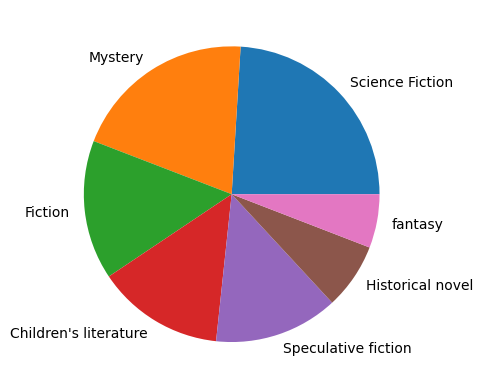

In [18]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'Science Fiction', 'Mystery', 'Fiction', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

fig, ax = plt.subplots()
ax.pie(y_train.value_counts(), labels = labels)

In [19]:
#  our balanced data created with Random overspampling 
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print(X_train_ros.shape)
print(y_train_ros.shape)

(11809, 4)
(11809,)


([<matplotlib.patches.Wedge at 0x169f5a5e4a0>,
 [Text(0.9910657451172095, 0.47727213291294374, 'Science Fiction'),
  Text(0.24477296280441296, 1.0724207181325571, 'Mystery'),
  Text(-0.68583886831644, 0.8600145619153347, 'Fiction'),
  Text(-1.0999999999999892, -1.5448414893833034e-07, "Children's literature"),
  Text(-0.6858386267552901, -0.8600147545539077, 'Speculative fiction'),
  Text(0.24477326402622548, -1.0724206493806185, 'Historical novel'),
  Text(0.9910658791734962, -0.47727185454211024, 'fantasy')])

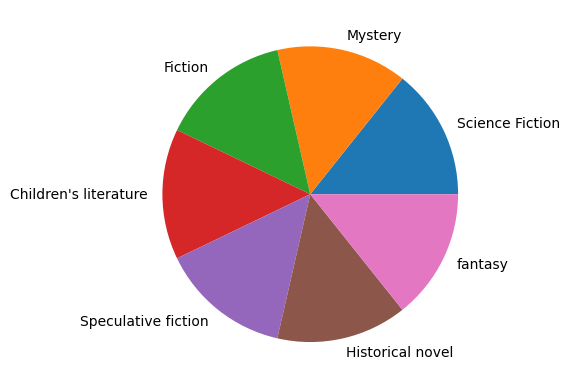

In [20]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'Science Fiction', 'Mystery', 'Fiction', 'Children\'s literature', 'Speculative fiction', 'Historical novel', 'fantasy'

fig, ax = plt.subplots()
ax.pie(y_train_ros.value_counts(), labels = labels)

In [21]:
# just checking the data, probably don't need this 
y_train

5536       Speculative fiction
14635                  Fantasy
14809         Historical novel
543            Science Fiction
11614         Historical novel
                 ...          
4092     Children's literature
3463     Children's literature
14619                  Mystery
15147    Children's literature
2753          Historical novel
Name: category, Length: 7019, dtype: object

# Bag of words, vector

In [47]:
# turning our book descriptions into a vector
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=2000)
# count_vect = CountVectorizer()
# not sure if i needed to us unicode 
X_train_counts = count_vect.fit_transform(X_train[6].astype('U'))
X_train_counts.shape

(7019, 2000)

In [48]:
# this is just showing us where are words are at 
# count_vect.vocabulary_.get(u'algorithm')
# count_vect.vocabulary_

In [49]:
# tf -idf stuff
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(7019, 2000)

# naive bayes

In [50]:
# trainging the model 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [51]:
# ohh wow it does not do good i guess 7 categories so that is better than just guessing 
print(clf.score(X_train_tfidf, y_train))
X_train_tfidf

0.6489528422852258


<7019x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 592470 stored elements in Compressed Sparse Row format>

In [27]:
# testing with test data 
X_new_counts = count_vect.transform(X_test[6])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted


array(["Children's literature", 'Mystery', 'Historical novel', ...,
       'Science Fiction', 'Science Fiction', 'Science Fiction'],
      dtype='<U21')

In [28]:
# so 
import numpy as np
np.mean(predicted == y_test)

0.5728504285319326

# NB using a pipline

In [46]:
# seems to work fine 
# cant use this X_data_counts = vectorizer.fit_transform(X_data.values.astype('U’))

from sklearn.pipeline import Pipeline
text_clf = Pipeline([
#     so i get 0.5805916505391209 with the top two
#     ('vect', CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=3000, ngram_range=(1,2))),
#     0.5728504285319326 with the bloew two lines
    ('vect', CountVectorizer(min_df = 5, lowercase= True, stop_words='english', max_features=2000)),
     ('tfidf', TfidfTransformer(use_idf=True)),
#     I get this with nothing 
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
    ('clf_2', MultinomialNB()),
])

text_clf.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf.predict(X_test[6])
np.mean(predicted == y_test)

0.5728504285319326

In [30]:
# #   'vect__analyzer': ['word', stemming] might try steeming later 
# from sklearn.model_selection import GridSearchCV
# parameters = {
# #      'vect__lowercase': (True, False),  
#     'vect__stop_words': ('english', None),
#     'vect__min_df': [2, 5, 10, 15],
#     'vect__max_features': [2000, 3000, 4000, 5000],
#     'vect__ngram_range': [(1, 1), (1, 2), (1,3)],
#     'tfidf__use_idf': (True, False)

# }

In [31]:
# gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

# gs_clf = gs_clf.fit(X_train[6], y_train)

# print(gs_clf.best_score_)

# for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

0.5959555531187748
tfidf__use_idf: True
vect__max_features: 3000
vect__min_df: 5
vect__ngram_range: (1, 2)
vect__stop_words: 'english'


# differnt classifier

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer(stop_words = 'english')),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
])

text_clf.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf.predict(X_test[6])
print(clf.score(X_train_tfidf, y_train))
np.mean(predicted == y_test)

0.6489528422852258


0.6104506497097042

In [33]:
# should propably double check this 
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

                       precision    recall  f1-score   support

Children's literature       0.63      0.59      0.61       503
              Fantasy       0.72      0.15      0.25       213
              Fiction       0.56      0.54      0.55       552
     Historical novel       0.61      0.35      0.45       262
              Mystery       0.64      0.84      0.73       727
      Science Fiction       0.61      0.88      0.72       869
  Speculative fiction       0.55      0.23      0.33       491

             accuracy                           0.61      3617
            macro avg       0.62      0.51      0.52      3617
         weighted avg       0.61      0.61      0.58      3617



array([[297,   7,  56,   8,  48,  63,  24],
       [ 22,  33,  12,   4,  25,  83,  34],
       [ 50,   0, 297,  14, 119,  68,   4],
       [ 20,   2,  54,  92,  35,  52,   7],
       [ 18,   1,  33,   6, 613,  54,   2],
       [ 14,   1,  18,   8,  44, 762,  22],
       [ 54,   2,  60,  18,  67, 176, 114]], dtype=int64)

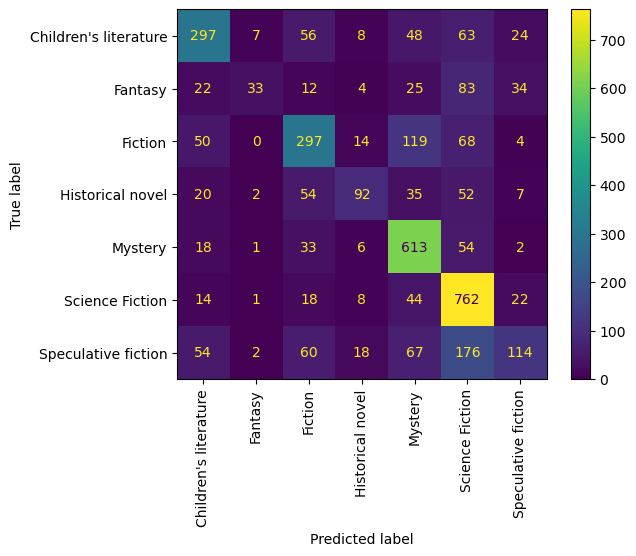

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
ConfusionMatrixDisplay.from_predictions(y_test, predicted, xticks_rotation='vertical')
# disp.plot(xticks_rotation='horizontal')
# plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'vect__stop_words': ['english', None]
#     'vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
#     'tfidf__use_idf': (True, False),
#     'clf__alpha': (1e-2, 1e-3, 1e-3),
}

In [36]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [37]:
gs_clf = gs_clf.fit(X_train[6], y_train)

In [38]:
# so now AM I using the best model??
print(gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))


0.6072078959819515
vect__stop_words: 'english'


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1, 1))),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
])

text_clf.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf.predict(X_test[6])
print(clf.score(X_train_tfidf, y_train))
np.mean(predicted == y_test)

0.6489528422852258


0.6060270942770252

In [40]:
text_clf.fit(X_train_ros[6], y_train_ros)
Pipeline(...)
predicted = text_clf.predict(X_test[6])
# print(clf.score(X_train_ros, y_train_ros))
np.mean(predicted == y_test)

0.611556538567874